In [284]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix
%matplotlib inline
import ast
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
#food desert data
food_desert = pd.ExcelFile('data/DataDownload2015.xlsx')
desert_data = food_desert.parse(2)
#desert_data.set_index('CensusTract', inplace=True)

In [6]:
length=np.array([len(str(i))==10 for i in desert_data['CensusTract']])

In [25]:
desert_data['CensusTract']=desert_data['CensusTract'].apply(lambda x: "0"+str(x) if len(str(x))==10 else str(x)) 

In [27]:
desert_data.set_index('CensusTract',inplace=True)

In [55]:
desert_data.head()

,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
CensusTract,,,,,,,,,,,,,,,,,,,,,
01001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,0,...,221,1622,217,14,0,14,45,44,26,112
01001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,0,...,214,888,1217,5,0,5,55,75,87,202
01001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,0,...,439,2576,647,17,5,11,117,87,108,120
01001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,0,...,904,4086,193,18,4,11,74,85,19,82
01001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [56]:
desert_data.shape

(72864, 146)

In [30]:
#behavioral health data
behav = pd.read_csv('data/500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2018_release.csv',)
#behav.set_index('TractFIPS', inplace=True)

In [32]:
behav['TractFIPS']=behav['TractFIPS'].apply(lambda x: "0"+str(x) if len(str(x))==10 else str(x)) 

In [37]:
behav.set_index('TractFIPS', inplace=True)

In [46]:
#merge first set of data frames
merge1 = behav.merge(desert_data, how='inner', left_index=True, right_index=True)

In [57]:
merge1.head()

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
01073000100,AL,Birmingham,107000,0107000-01073000100,3042,23.3,"(20.6, 26.3)",31.3,"(30.3, 32.5)",11.5,...,231,530,2384,25,0,7,96,82,141,260
01073000300,AL,Birmingham,107000,0107000-01073000300,2735,28.5,"(25.2, 31.7)",30.2,"(29.0, 31.4)",12.0,...,197,498,1710,33,0,4,490,623,287,377
01073000400,AL,Birmingham,107000,0107000-01073000400,3338,23.9,"(20.5, 27.6)",31.7,"(30.3, 33.0)",11.6,...,318,256,2927,10,0,7,138,162,246,501
01073000500,AL,Birmingham,107000,0107000-01073000500,2864,25.8,"(22.0, 29.9)",35.6,"(34.1, 37.0)",10.0,...,417,83,2684,1,10,5,81,89,345,522
01073000700,AL,Birmingham,107000,0107000-01073000700,2577,29.4,"(24.8, 34.2)",37.2,"(35.8, 38.6)",8.4,...,326,12,2538,1,0,1,25,12,198,506


In [58]:
merge1.shape

(27204, 207)

In [60]:
merge1.head()

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
01073000100,AL,Birmingham,107000,0107000-01073000100,3042,23.3,"(20.6, 26.3)",31.3,"(30.3, 32.5)",11.5,...,231,530,2384,25,0,7,96,82,141,260
01073000300,AL,Birmingham,107000,0107000-01073000300,2735,28.5,"(25.2, 31.7)",30.2,"(29.0, 31.4)",12.0,...,197,498,1710,33,0,4,490,623,287,377
01073000400,AL,Birmingham,107000,0107000-01073000400,3338,23.9,"(20.5, 27.6)",31.7,"(30.3, 33.0)",11.6,...,318,256,2927,10,0,7,138,162,246,501
01073000500,AL,Birmingham,107000,0107000-01073000500,2864,25.8,"(22.0, 29.9)",35.6,"(34.1, 37.0)",10.0,...,417,83,2684,1,10,5,81,89,345,522
01073000700,AL,Birmingham,107000,0107000-01073000700,2577,29.4,"(24.8, 34.2)",37.2,"(35.8, 38.6)",8.4,...,326,12,2538,1,0,1,25,12,198,506


In [51]:
#target: food desert or not
y=merge1.pop('LILATracts_1And10')

In [62]:
#feature matrix
X=merge1

In [198]:
X.shape

(27204, 207)

In [109]:
(np.array([len(i)==11 for i in X.index])).sum()

27204

In [77]:
healthy_clean=pd.read_csv('data/healthy_clean.csv',index_col=0)
healthy_clean['census']=healthy_clean['census'].apply(lambda x: "0"+str(x) if len(str(x))==10 else str(x)) 

In [179]:
healthy_clean.shape

(10315, 9)

In [142]:
(np.array([len(i)==11 for i in healthy_clean.census])).sum()

10315

In [134]:
unhealthy_clean=pd.read_csv('data/unhealthy_clean.csv',index_col=0)
unhealthy_clean['census']=unhealthy_clean['census'].apply(lambda x: "0"+str(x) if len(str(x))==10 else str(x)) 

In [135]:
unhealthy_clean.dropna(axis=0, inplace=True)

In [136]:
unhealthy_clean.census=unhealthy_clean.census.apply(int)

In [138]:
unhealthy_clean['census']=unhealthy_clean['census'].apply(lambda x: "0"+str(x) if len(str(x))==10 else str(x)) 

In [140]:
(np.array([len(i)==11 for i in unhealthy_clean.census])).sum()

9642

In [145]:
grocery_stores_clean=pd.read_csv('data/grocery_stores_clean.csv',index_col=0)
grocery_stores_clean['census']=grocery_stores_clean['census'].apply(lambda x: "0"+str(x) if len(str(x))==10 else str(x)) 

In [147]:
(np.array([len(i)==10 for i in grocery_stores_clean.census])).sum()

0

In [148]:
ff_stores_clean=pd.read_csv('data/ff_stores_clean.csv',index_col=0)
ff_stores_clean['census']=ff_stores_clean['census'].apply(lambda x: "0"+str(x) if len(str(x))==10 else str(x)) 

In [150]:
(np.array([len(i)==11 for i in ff_stores_clean.census])).sum()

0

In [192]:
l2 = list(healthy_clean.census)+list(unhealthy_clean.census)+list(grocery_stores_clean.census)+list(ff_stores_clean.census)

In [193]:
len(l2)

27729

In [194]:
unique_tracts=set(l2)

In [195]:
len(unique_tracts)

12101

In [196]:
type(unique_tracts)

set

In [200]:
healthy_clean['county'] = healthy_clean['census'].apply(lambda x: x[:5])

In [203]:
len(healthy_clean['county'].unique())

896

In [211]:
healthy_clean['sentiment']=healthy_clean['sentiment'].apply(ast.literal_eval)


In [212]:
healthy_clean['comp']=healthy_clean['sentiment'].apply(lambda x: x['compound'])

In [213]:
healthy_clean.head()

,_id,census,coords,full_data,keyword,lat,long,sentiment,text,county,comp
0,5ca16a79626b3063a471a53f,12086006206,"[25.7540587, -80.2609892]",{'created_at': 'Mon Apr 01 00:55:48 +0000 2019...,almond,25.754059,-80.260989,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","Almond cake , mango and raspberry compote , le...",12086,0.0000
1,5ca16a79626b3063a471a55c,51059460600,"[38.892, -77.2311]",{'created_at': 'Mon Apr 01 00:35:42 +0000 2019...,almond,38.892000,-77.231100,"{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'comp...",Bucatini with Faux Meat Sauce and Garlic Bread...,51059,-0.1531
2,5ca16a7a626b3063a471a607,17111870903,"[42.3176, -88.4462]",{'created_at': 'Sun Mar 31 22:38:52 +0000 2019...,almond,42.317600,-88.446200,"{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'comp...","Even though I can't work out right now, I can ...",17111,0.5093
3,5ca16a7b626b3063a471a610,36047055500,"[40.71821, -73.9638499]",{'created_at': 'Sun Mar 31 22:30:45 +0000 2019...,almond,40.718210,-73.963850,"{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'comp...",NEW:: SMOKED ALMOND BUTTERSCOTCH // WILLIAMSBU...,36047,0.4889
4,5ca16a7b626b3063a471a622,06073008902,"[32.7674659, -117.1660147]",{'created_at': 'Sun Mar 31 22:21:01 +0000 2019...,almond,32.767466,-117.166015,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",Matcha &amp; strawberry almond swirl w/ berrie...,06073,0.4926


In [237]:
county_sent = healthy_clean.groupby('county').mean()['comp']
county_sent=county_sent.reset_index()

In [238]:
county_sent.head()

,county,comp
0,01003,0.265528
1,01031,0.000000
2,01065,0.000000
3,01069,-0.127267
4,01073,0.217863


In [222]:
X['county'] = [i[:5] for i in X.index]

In [239]:
X_1 = pd.merge(X,county_sent,how='left',left_on='county', right_on='county')

In [248]:
X_1.fillna(-1,inplace=True)

In [250]:
(X_1['comp'].isnull()).sum()

0

In [258]:
X_1.shape

(27204, 209)

In [259]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.33, random_state=42)

In [260]:
X_train.head()

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,county,comp
25677,UT,Orem,4957300,4957300-49049001001,3631,11.1,"( 9.5, 12.9)",21.6,"(20.7, 22.6)",8.8,...,20,64,39,18,265,373,19,51,49049,0.483760
22707,TX,San Antonio,4865000,4865000-48029152100,184,36.4,"(32.5, 40.5)",24.2,"(23.2, 25.3)",14.9,...,92,97,11,78,825,4623,40,329,48029,0.191640
8268,FL,Jacksonville,1235000,1235000-12031012601,2947,23.8,"(21.1, 26.8)",24.0,"(23.3, 24.6)",16.7,...,1518,34,0,12,140,139,176,468,12031,0.417281
1836,CA,Chico,613014,0613014-06007000903,6102,10.0,"( 8.4, 11.8)",18.4,"(17.3, 19.3)",20.0,...,162,429,26,120,937,1224,236,222,06007,0.525500
24755,TX,Corpus Christi,4817000,4817000-48355000500,1661,40.8,"(38.1, 43.5)",28.3,"(27.6, 29.1)",13.9,...,628,0,0,6,242,960,109,215,48355,0.186867


In [253]:
subset = X_train[['TractWhite',
'TractBlack',
'TractAsian',
'TractNHOPI',
'TractAIAN',
'TractOMultir',
'TractHispanic',
'TractHUNV',
'TractSNAP',
'OHU2010','PovertyRate','Population2010']]

In [12]:
#create a full corr matrix with the X and y
test = subset.copy()
test['target']=y_train
test.corr()

,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,OHU2010,PovertyRate,Population2010,target
TractWhite,1.000000,-0.351853,0.096984,-0.006491,0.188375,0.137745,0.246858,-0.042633,-0.068180,0.753049,-0.393673,0.524475,-0.059580
TractBlack,-0.351853,1.000000,-0.139225,-0.053131,-0.074738,-0.041877,-0.084438,0.251363,0.500651,0.121495,0.310474,0.153296,0.178195
TractAsian,0.096984,-0.139225,1.000000,0.223674,0.010677,0.178707,0.068677,0.091667,-0.114721,0.278149,-0.185139,0.323366,-0.115467
TractNHOPI,-0.006491,-0.053131,0.223674,1.000000,0.068106,0.186392,0.043886,-0.029935,0.022554,0.052096,-0.039068,0.126188,0.002573
TractAIAN,0.188375,-0.074738,0.010677,0.068106,1.000000,0.384760,0.326254,0.036544,0.215912,0.195590,0.058717,0.233160,0.041809
TractOMultir,0.137745,-0.041877,0.178707,0.186392,0.384760,1.000000,0.864182,0.133728,0.340904,0.212833,0.154369,0.445099,0.012084
TractHispanic,0.246858,-0.084438,0.068677,0.043886,0.326254,0.864182,1.000000,0.093238,0.357090,0.206529,0.150234,0.419046,0.046741
TractHUNV,-0.042633,0.251363,0.091667,-0.029935,0.036544,0.133728,0.093238,1.000000,0.438192,0.309912,0.227002,0.242075,-0.049420
TractSNAP,-0.068180,0.500651,-0.114721,0.022554,0.215912,0.340904,0.357090,0.438192,1.000000,0.226792,0.556177,0.291451,0.202267
OHU2010,0.753049,0.121495,0.278149,0.052096,0.195590,0.212833,0.206529,0.309912,0.226792,1.000000,-0.266350,0.683531,-0.017651


In [13]:
#remove confidence intervals
select_cols=["PovertyRate","TractSNAP"]
for i in X_train.columns:
    if '95CI' not in i:
        select_cols.append(i)

In [14]:
#test1 = X_train[select_cols]
#test1['target']=y_train
#test1.corr()

In [261]:
#fill nulls and subset data
def clean(df):
    df.fillna(df.mean(),inplace=True)
    data1=df[['TEETHLOST_CrudePrev','STROKE_CrudePrev','PHLTH_CrudePrev','OBESITY_CrudePrev','MHLTH_CrudePrev','LPA_CrudePrev','KIDNEY_CrudePrev','DENTAL_CrudePrev','DIABETES_CrudePrev','CSMOKING_CrudePrev','COREW_CrudePrev','COPD_CrudePrev','CHOLSCREEN_CrudePrev','CASTHMA_CrudePrev','ACCESS2_CrudePrev','PovertyRate','TractSNAP','comp']]
    return data1

In [262]:
#X_train after cleaning
df=clean(X_train)

In [42]:
df=df[['TEETHLOST_CrudePrev','STROKE_CrudePrev','PHLTH_CrudePrev','OBESITY_CrudePrev','MHLTH_CrudePrev','LPA_CrudePrev','KIDNEY_CrudePrev','DENTAL_CrudePrev','DIABETES_CrudePrev','CSMOKING_CrudePrev','COREW_CrudePrev','COPD_CrudePrev','CHOLSCREEN_CrudePrev','CASTHMA_CrudePrev','ACCESS2_CrudePrev','TractSNAP']]

In [273]:
train1=df[['TEETHLOST_CrudePrev','STROKE_CrudePrev','PHLTH_CrudePrev','OBESITY_CrudePrev','MHLTH_CrudePrev','LPA_CrudePrev','KIDNEY_CrudePrev','DENTAL_CrudePrev','DIABETES_CrudePrev','CSMOKING_CrudePrev','COREW_CrudePrev','COPD_CrudePrev','CHOLSCREEN_CrudePrev','CASTHMA_CrudePrev','ACCESS2_CrudePrev','TractSNAP','PovertyRate','comp']]

In [274]:
train1['Population2010']=X_train['Population2010']
train1['PCTGQTRS']=X_train['PCTGQTRS']
train1['HUNVFlag']=X_train['HUNVFlag']
train1['TractLOWI']=X_train['TractLOWI']/train1['Population2010']
train1['TractKids']=X_train['TractKids']/train1['Population2010']
train1['TractSeniors']=X_train['TractSeniors']/train1['Population2010']
train1['TractWhite']=X_train['TractWhite']/train1['Population2010']
train1['TractBlack']=X_train['TractBlack']/train1['Population2010']
train1['TractAsian']=X_train['TractAsian']/train1['Population2010']
train1['TractNHOPI']=X_train['TractNHOPI']/train1['Population2010']
train1['TractAIAN']=X_train['TractAIAN']/train1['Population2010']
train1['TractOMultir']=X_train['TractOMultir']/train1['Population2010']
train1['TractHispanic']=X_train['TractHispanic']/train1['Population2010']
train1['TractHUNV']=X_train['TractHUNV']/train1['Population2010']
train1['TractSNAP']=X_train['TractSNAP']/train1['Population2010']


In [275]:
df.shape

(18226, 18)

In [276]:
#pd.scatter_matrix(train1)

In [264]:
#X test after cleaning
df_test = clean(X_test)

In [277]:
test1=df_test[['TEETHLOST_CrudePrev','STROKE_CrudePrev','PHLTH_CrudePrev','OBESITY_CrudePrev','MHLTH_CrudePrev','LPA_CrudePrev','KIDNEY_CrudePrev','DENTAL_CrudePrev','DIABETES_CrudePrev','CSMOKING_CrudePrev','COREW_CrudePrev','COPD_CrudePrev','CHOLSCREEN_CrudePrev','CASTHMA_CrudePrev','ACCESS2_CrudePrev','TractSNAP','PovertyRate','comp']]

In [278]:
test1['Population2010']=X_test['Population2010']
test1['PCTGQTRS']=X_test['PCTGQTRS']
test1['HUNVFlag']=X_test['HUNVFlag']
test1['TractLOWI']=X_test['TractLOWI']/X_test['Population2010']
test1['TractKids']=X_test['TractKids']/X_test['Population2010']
test1['TractSeniors']=X_test['TractSeniors']/X_test['Population2010']
test1['TractWhite']=X_test['TractWhite']/X_test['Population2010']
test1['TractBlack']=X_test['TractBlack']/X_test['Population2010']
test1['TractAsian']=X_test['TractAsian']/X_test['Population2010']
test1['TractNHOPI']=X_test['TractNHOPI']/X_test['Population2010']
test1['TractAIAN']=X_test['TractAIAN']/X_test['Population2010']
test1['TractOMultir']=X_test['TractOMultir']/X_test['Population2010']
test1['TractHispanic']=X_test['TractHispanic']/X_test['Population2010']
test1['TractHUNV']=X_test['TractHUNV']/X_test['Population2010']
test1['TractSNAP']=X_test['TractSNAP']/X_test['Population2010']

In [267]:
df_test.shape

(8978, 18)

In [25]:
train1.corr()

,TEETHLOST_CrudePrev,STROKE_CrudePrev,PHLTH_CrudePrev,OBESITY_CrudePrev,MHLTH_CrudePrev,LPA_CrudePrev,KIDNEY_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,CSMOKING_CrudePrev,...,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV
TEETHLOST_CrudePrev,1.000000,0.808757,0.901006,0.826833,0.916758,0.892501,0.780743,-0.908201,0.785284,0.894902,...,-0.024303,-0.059177,-0.086039,0.107272,-0.094206,-0.027961,-0.002793,0.020236,0.018849,0.149446
STROKE_CrudePrev,0.808757,1.000000,0.870385,0.758725,0.621346,0.789489,0.965703,-0.684272,0.942624,0.683784,...,-0.011159,0.018525,-0.052523,0.119859,-0.076317,-0.018077,-0.004768,-0.003761,0.001893,0.170093
PHLTH_CrudePrev,0.901006,0.870385,1.000000,0.816836,0.846401,0.915131,0.905126,-0.878012,0.885057,0.808008,...,0.000507,-0.013046,-0.052790,0.085572,-0.087368,-0.011425,0.015262,0.052911,0.057561,0.130658
OBESITY_CrudePrev,0.826833,0.758725,0.816836,1.000000,0.759240,0.811638,0.729272,-0.784120,0.778267,0.827773,...,0.014848,-0.032761,-0.047007,0.149226,-0.123977,-0.027170,0.005386,0.014866,0.026122,0.070307
MHLTH_CrudePrev,0.916758,0.621346,0.846401,0.759240,1.000000,0.806560,0.610999,-0.898365,0.609886,0.891248,...,-0.019694,-0.079894,-0.082460,0.090007,-0.101479,-0.011692,0.009570,0.043146,0.034694,0.108316
LPA_CrudePrev,0.892501,0.789489,0.915131,0.811638,0.806560,1.000000,0.823586,-0.895072,0.860085,0.787216,...,-0.007514,-0.036105,-0.071646,0.105112,-0.074137,-0.028005,-0.003428,0.038543,0.053826,0.146991
KIDNEY_CrudePrev,0.780743,0.965703,0.905126,0.729272,0.610999,0.823586,1.000000,-0.717181,0.955630,0.619197,...,-0.004851,0.026699,-0.046104,0.091059,-0.066708,-0.000852,0.001812,0.026414,0.038887,0.161436
DENTAL_CrudePrev,-0.908201,-0.684272,-0.878012,-0.784120,-0.898365,-0.895072,-0.717181,1.000000,-0.740189,-0.805309,...,0.008270,0.067592,0.084113,-0.097510,0.068444,0.008032,-0.008561,-0.070846,-0.074860,-0.118111
DIABETES_CrudePrev,0.785284,0.942624,0.885057,0.778267,0.609886,0.860085,0.955630,-0.740189,1.000000,0.635907,...,-0.001232,0.008328,-0.057910,0.122304,-0.052038,-0.014309,-0.005945,0.019798,0.035178,0.155503
CSMOKING_CrudePrev,0.894902,0.683784,0.808008,0.827773,0.891248,0.787216,0.619197,-0.805309,0.635907,1.000000,...,-0.018886,-0.062663,-0.069235,0.108306,-0.113322,-0.026464,0.003556,-0.005807,-0.009916,0.103412


In [268]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score,recall_score,precision_score,roc_curve
from sklearn.model_selection import GridSearchCV



In [45]:
#gradient boosting grid search
gb_grid = {'n_estimators': [10,50,100],
                  'min_samples_leaf': [1, 7, 9, 13],
                  'max_depth': [3, 4, 5],
                  'max_features': [2, 5, 10, 12,15],
                  'learning_rate': [0.01,.1,1]}
gb_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gb_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='f1')
gb_gridsearch.fit(train1, y_train)

print( "best parameters:", gb_gridsearch.best_params_ )

best_gb_model = gb_gridsearch.best_estimator_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 33.6min finished


best parameters: {'learning_rate': 1, 'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 100}


In [46]:
best_gb_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=4,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
#old:
'''
best_gb_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=7, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
'''

In [48]:
best_gb_model.fit(train1,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=4,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [49]:
#new model:
#GBtrial 2 GS
#Best so far
print("GRADIENT BOOSTING 2 GS")
print()

print("TRAIN on GB_GS")
print("ROC_AUC score: ", cross_val_score(best_gb_model,train1,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(best_gb_model,train1,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(best_gb_model,train1,y_train,cv=5,scoring='f1').mean())

#best_gb_model.fit(df_train,y_train)
y_pred = best_gb_model.predict(test1)

print()
print("TEST on GB_GS")
print("ROC_AUC score: ", roc_auc_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))

GRADIENT BOOSTING 2 GS

TRAIN on GB_GS
ROC_AUC score:  0.839052385800532
Accuracy score:  0.8807460947283318
f1 score:  0.38672700444324815

TEST on GB_GS
ROC_AUC score:  0.6318188775510204
Accuracy score:  0.8760579064587973
f1 score:  0.3599769982748706
recall score:  0.3193877551020408
precision score:  0.41238471673254284


In [58]:
#older
#GBtrial 2 GS
#Best so far
print("GRADIENT BOOSTING 2 GS")
print()

print("TRAIN on GB_GS")
print("ROC_AUC score: ", cross_val_score(best_gb_model,train1,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(best_gb_model,train1,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(best_gb_model,train1,y_train,cv=5,scoring='f1').mean())

#best_gb_model.fit(df_train,y_train)
y_pred = best_gb_model.predict(test1)

print()
print("TEST on GB_GS")
print("ROC_AUC score: ", roc_auc_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))

GRADIENT BOOSTING 2 GS

TRAIN on GB_GS
ROC_AUC score:  0.8956559651829747
Accuracy score:  0.8194185408667032
f1 score:  0.751665917187941

TEST on GB_GS
ROC_AUC score:  0.8055470865458153
Accuracy score:  0.8193763919821826
f1 score:  0.7508448540706606
recall score:  0.7561881188118812
precision score:  0.7455765710799268


In [31]:
from sklearn.svm import LinearSVC

In [32]:
model = LinearSVC(penalty='l2',loss='hinge')
model.fit(train1,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [42]:
#SVM
print("SVM")
print()

print("TRAIN on SVM")
print("ROC_AUC score: ", cross_val_score(model,train1,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(model,train1,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(model,train1,y_train,cv=5,scoring='f1').mean())

#best_gb_model.fit(df_train,y_train)
y_pred = model.predict(test1)

print()
print("TEST on SVM")
print("ROC_AUC score: ", roc_auc_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))

SVM

TRAIN on SVM
ROC_AUC score:  0.7788857820907447
Accuracy score:  0.7221064179923203
f1 score:  0.5919164040810829

TEST on GB_GS
ROC_AUC score:  0.713847735243253
Accuracy score:  0.6400890868596882
f1 score:  0.6614997905320487
recall score:  0.9771039603960396
precision score:  0.5


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [44]:
confusion_matrix(y_test,y_pred)

array([[2590, 3158],
       [  74, 3158]])

In [46]:
model = LogisticRegression(penalty='l1')
model.fit(train1,y_train)
#SVM
print("SVM")
print()

print("TRAIN on SVM")
print("ROC_AUC score: ", cross_val_score(model,train1,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(model,train1,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(model,train1,y_train,cv=5,scoring='f1').mean())

#best_gb_model.fit(df_train,y_train)
y_pred = model.predict(test1)

print()
print("TEST on SVM")
print("ROC_AUC score: ", roc_auc_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))

SVM

TRAIN on SVM
ROC_AUC score:  0.865100148551945
Accuracy score:  0.7857377948436642
f1 score:  0.6842325350966063

TEST on SVM
ROC_AUC score:  0.7521145968981031
Accuracy score:  0.7837416481069043
f1 score:  0.680276588738887
recall score:  0.6392326732673267
precision score:  0.7269528501055594


In [63]:
map_data = pd.read_csv('../data/map_df.csv')

In [65]:
map_data = map_data.drop("Unnamed: 0", axis = 1)

In [67]:
map_data.set_index('census', inplace=True)

In [78]:
new_df = map_data.join(y, how='left')

In [87]:
tract_df = new_df[new_df['LILATracts_halfAnd10'].isnull()==False]

In [88]:
tract_df.to_csv('../data/tract_df.csv')

In [269]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [271]:
#new RF model after GS
best_rf_model = model

#new RF params
print("RANDOM FOREST 2 (GS)")
print()

#train stats
print("TRAIN on RF_GS")
print("ROC_AUC score: ", cross_val_score(best_rf_model,train1,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(best_rf_model,train1,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(best_rf_model,train1,y_train,cv=5,scoring='f1').mean())

#predict and get test stats
best_rf_model.fit(train1,y_train)
y_pred = best_rf_model.predict(test1)

print()
print("TEST on RF_GS")
print("ROC_AUC score: ", roc_auc_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))

RANDOM FOREST 2 (GS)

TRAIN on RF_GS
ROC_AUC score:  0.857785117505838
Accuracy score:  0.891967201249812
f1 score:  0.1496602568162319

TEST on RF_GS
ROC_AUC score:  0.5377691944226344
Accuracy score:  0.8942971708621074
f1 score:  0.1458145814581458


In [272]:
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))

recall score:  0.08463949843260188
precision score:  0.525974025974026


In [279]:
#new RF model after GS
best_rf_model = model

#new RF params
print("RANDOM FOREST 2 (GS)")
print()

#train stats
print("TRAIN on RF_GS")
print("ROC_AUC score: ", cross_val_score(best_rf_model,train1,y_train,cv=5,scoring='roc_auc').mean())
print("Accuracy score: ", cross_val_score(best_rf_model,train1,y_train,cv=5).mean())
print("f1 score: ", cross_val_score(best_rf_model,train1,y_train,cv=5,scoring='f1').mean())

#predict and get test stats
best_rf_model.fit(train1,y_train)
y_pred = best_rf_model.predict(test1)

print()
print("TEST on RF_GS")
print("ROC_AUC score: ", roc_auc_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))

RANDOM FOREST 2 (GS)

TRAIN on RF_GS
ROC_AUC score:  0.903688424713444
Accuracy score:  0.9005268573954105
f1 score:  0.2887307770082389

TEST on RF_GS
ROC_AUC score:  0.5873501207710116
Accuracy score:  0.9023167743372689
f1 score:  0.28987854251012146
recall score:  0.18704284221525602
precision score:  0.6438848920863309


In [281]:
confusion_matrix(y_test,y_pred)

array([[7922,   99],
       [ 778,  179]])

In [296]:
def permutation_importance(model, X_test, y_test, scorer=f1_score):
    ''' Calculates permutation feature importance for a fitted model
    
    Parameters
    ----------
    model: anything with a predict() method
    X_test, y_test: numpy arrays of data
        unseen by model
    scorer: function. Should be a "higher is better" scoring function,
        meaning that if you want to use an error metric, you should
        multiply it by -1 first.
        ex: >> neg_mse = lambda y1, y2: -mean_squared_error(y1, y2)
            >> permutation_importance(mod, X, y, scorer=neg_mse)
    
    Returns
    -------
    feat_importances: numpy array of permutation importance
        for each feature
    
    '''
    
    feat_importances = np.zeros(X_test.shape[1])
    test_score = scorer(model.predict(X_test), y_test)
    for i in range(X_test.shape[1]):
        X_test_shuffled = shuffle_column(X_test, i)
        test_score_permuted = scorer(y_test, model.predict(X_test_shuffled))
        feat_importances[i] = test_score - test_score_permuted
    return feat_importances

def shuffle_column(X, feature_index):
    ''' 
    Parameters
    ----------
    X: numpy array
    feature_index: int
    
    Returns
    -------
    X_new: numpy array
    
    Returns a new array identical to X but
    with all the values in column feature_index
    shuffled
    '''   
    
    X_new = X.copy()
    np.random.shuffle(X_new[:,feature_index])
    return X_new

## Plot of feature importances
def plot_feat_import(f_imps, names, n):
    sorts = np.argsort(f_imps)
    
    last_x = f_imps[sorts[-n:]]
    last_x_names = names[sorts[-n:]]

    idx = np.arange(len(names))

    plt.barh(idx[-n:], last_x, align='center')
    plt.yticks(idx[-n:], last_x_names)

    plt.title("Permutation Importances in Random Forest")
    plt.xlabel('Relative Importance of Feature')
    plt.ylabel('Feature Name')
    plt.savefig("feature_importances.jpg")
    plt.show()

In [297]:
test1.columns

Index(['TEETHLOST_CrudePrev', 'STROKE_CrudePrev', 'PHLTH_CrudePrev',
       'OBESITY_CrudePrev', 'MHLTH_CrudePrev', 'LPA_CrudePrev',
       'KIDNEY_CrudePrev', 'DENTAL_CrudePrev', 'DIABETES_CrudePrev',
       'CSMOKING_CrudePrev', 'COREW_CrudePrev', 'COPD_CrudePrev',
       'CHOLSCREEN_CrudePrev', 'CASTHMA_CrudePrev', 'ACCESS2_CrudePrev',
       'TractSNAP', 'PovertyRate', 'comp', 'Population2010', 'PCTGQTRS',
       'HUNVFlag', 'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite',
       'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV'],
      dtype='object')

In [298]:
test1cols = np.array(['TEETHLOST_CrudePrev', 'STROKE_CrudePrev', 'PHLTH_CrudePrev',
       'OBESITY_CrudePrev', 'MHLTH_CrudePrev', 'LPA_CrudePrev',
       'KIDNEY_CrudePrev', 'DENTAL_CrudePrev', 'DIABETES_CrudePrev',
       'CSMOKING_CrudePrev', 'COREW_CrudePrev', 'COPD_CrudePrev',
       'CHOLSCREEN_CrudePrev', 'CASTHMA_CrudePrev', 'ACCESS2_CrudePrev',
       'TractSNAP', 'TractSNAP', 'comp', 'Population2010', 'PCTGQTRS',
       'HUNVFlag', 'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite',
       'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV'])

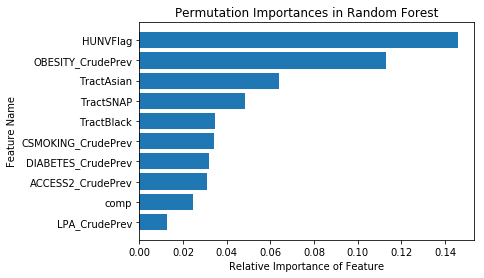

In [299]:
f_imp = permutation_importance(best_rf_model,test1.values,y_test.values)
plot_feat_import(f_imp, test1cols, 10)